In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_columns=None

scores = pd.read_csv('scores.csv')
scores.head(3)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%


In [3]:
scores.shape

(435, 22)

In [4]:
scores.isnull().any()

School ID                      False
School Name                    False
Borough                        False
Building Code                  False
Street Address                 False
City                           False
State                          False
Zip Code                       False
Latitude                       False
Longitude                      False
Phone Number                   False
Start Time                      True
End Time                        True
Student Enrollment              True
Percent White                   True
Percent Black                   True
Percent Hispanic                True
Percent Asian                   True
Average Score (SAT Math)        True
Average Score (SAT Reading)     True
Average Score (SAT Writing)     True
Percent Tested                  True
dtype: bool

In [5]:
#Nan값이 들어가 있는 행을 삭제해준다
scores = scores.dropna(axis=0)

In [6]:
scores.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4773,8:00 AM,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-505-0143,8:30 AM,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,212-475-4097,8:00 AM,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,212-406-9411,8:30 AM,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [7]:
scores.shape

(374, 22)

In [8]:
#비교하고자 하는 column들만 뽑아서 새로운 데이터프레임 생성
exam = pd.DataFrame({'city' : scores['Borough']})

In [9]:
exam['math'] = scores['Average Score (SAT Math)']
exam['reading'] = scores['Average Score (SAT Reading)']
exam['writing'] = scores['Average Score (SAT Writing)']

In [10]:
exam['total'] = exam['math'] + exam['reading'] + exam['writing']

In [11]:
exam.head()

,city,math,reading,writing,total
2,Manhattan,657.0,601.0,601.0,1859.0
3,Manhattan,395.0,411.0,387.0,1193.0
4,Manhattan,418.0,428.0,415.0,1261.0
5,Manhattan,613.0,453.0,463.0,1529.0
6,Manhattan,410.0,406.0,381.0,1197.0


In [12]:
#인덱스를 초기화 시켜준다
exam = exam.reset_index(drop=True)

In [13]:
exam.head()

,city,math,reading,writing,total
0,Manhattan,657.0,601.0,601.0,1859.0
1,Manhattan,395.0,411.0,387.0,1193.0
2,Manhattan,418.0,428.0,415.0,1261.0
3,Manhattan,613.0,453.0,463.0,1529.0
4,Manhattan,410.0,406.0,381.0,1197.0


In [14]:
#각 도시별로 몇 개의 행이 존재하는지 확인 (담을 그릇의 크기 확인)
exam['city'].value_counts()

Brooklyn         109
Bronx             98
Manhattan         89
Queens            68
Staten Island     10
Name: city, dtype: int64

In [16]:
# 각 컬럼의 그룹(도시)별 분산을 관찰하기 위해 요소별 평균을 구한다
math_means = exam.groupby(['city']).agg({'math':np.mean})
reading_means = exam.groupby(['city']).agg({'reading':np.mean})
writing_means = exam.groupby(['city']).agg({'writing':np.mean})
total_means = exam.groupby(['city']).agg({'total':np.mean})

math_means

,math
city,
Bronx,404.357143
Brooklyn,416.403670
Manhattan,455.887640
Queens,461.558824
Staten Island,486.200000


In [17]:
#컬럼별 Permutation test를 시행해기 위한 함수 생성

def anova_perm(columns,num):
    random_generator = np.random.RandomState(42)

    perm_vars= []

    values = exam[columns].values
    
    for _ in range(num):
        brx = len(exam[exam['city'] == 'Bronx'])  #각 그룹(도시)의 데이터크기 설정
        bkl = len(exam[exam['city'] == 'Brooklyn'])
        mht = len(exam[exam['city'] == 'Manhattan'])
        qns = len(exam[exam['city'] == 'Queens'])
        sti = len(exam[exam['city'] == 'Staten Island'])

        values_copy = values.copy()
        random_generator.shuffle(values_copy)
        
        #각 도시의 원래 데이터 크기만큼 랜덤으로 섞인 성적들을 순서대로 담는다
        brx_sc = values_copy[:brx]
        bkl_sc = values_copy[brx:brx+bkl]
        mht_sc = values_copy[brx+bkl:brx+bkl+mht]
        qns_sc = values_copy[brx+bkl+mht:brx+bkl+mht+qns]
        sti_sc = values_copy[brx+bkl+mht+qns:]
        
        #표본평균의 분산을 구해서 쌓는다
        perm_vars.append(np.var([brx_sc.mean(), bkl_sc.mean(), mht_sc.mean(), qns_sc.mean(), sti_sc.mean()],ddof=1))
    
    return np.array(perm_vars)            

In [18]:
math_var = math_means['math'].var()
math_var

1139.9242572410137

In [19]:
perm_result = anova_perm('math',10000)

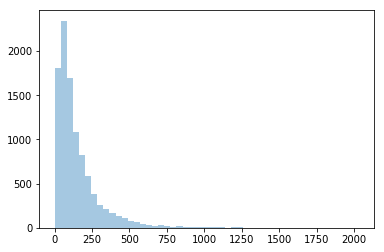

In [20]:
sns.distplot(perm_result, kde=False)

In [21]:
print('관찰된 변동', math_var)

sum(perm_result > math_var) / len(perm_result)


관찰된 변동 1139.9242572410137


0.0037

순열 검정의 결과에서 관찰된 결과보다 극단적인 값이 나올 확률, 즉 random variance를 벗어날 확률인 P-value가 0.003 < 0.05(유의수준 $\alpha$) 이므로, 귀무가설을 기각할 증거가 충분하다

In [22]:
reading_var = reading_means['reading'].var()
reading_var

922.0023734511205

In [23]:
perm_result = anova_perm('reading',10000)

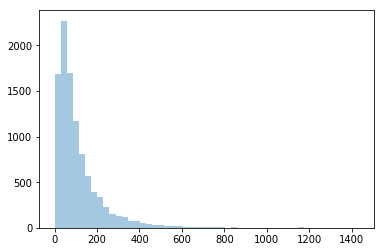

In [24]:
sns.distplot(perm_result, kde=False)

In [25]:
print('관찰된 변동', reading_var)

sum(perm_result > reading_var) / len(perm_result)

관찰된 변동 922.0023734511205


0.0026

순열 검정의 결과에서 관찰된 결과보다 극단적인 값이 나올 확률, 즉 random variance를 벗어날 확률인 P-value가 0.0026 < 0.05(유의수준 $\alpha$) 이므로, 귀무가설을 기각할 증거가 충분하다

In [26]:
writing_var = writing_means['writing'].var()
writing_var

1006.0319244217925

In [27]:
perm_result = anova_perm('writing',10000)

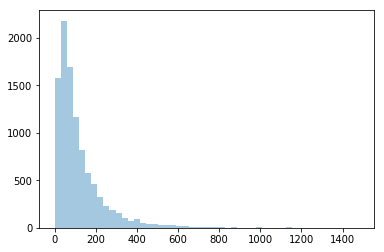

In [28]:
sns.distplot(perm_result, kde=False)

In [29]:
print('관찰된 변동', writing_var)

sum(perm_result > writing_var) / len(perm_result)

관찰된 변동 1006.0319244217925


0.0028

순열 검정의 결과에서 관찰된 결과보다 극단적인 값이 나올 확률, 즉 random variance를 벗어날 확률인 P-value가 0.0028 < 0.05(유의수준 $\alpha$) 이므로, 귀무가설을 기각할 증거가 충분하다

In [34]:
total_var = total_means['total'].var()
total_var

9131.823229778158

In [35]:
perm_result = anova_perm('total',10000)

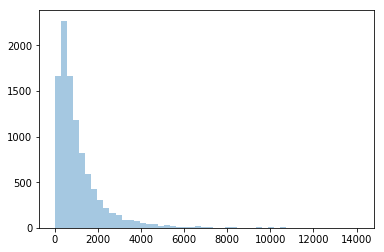

In [36]:
sns.distplot(perm_result, kde=False)

In [37]:
print('관찰된 변동', total_var)

sum(perm_result > total_var) / len(perm_result)

관찰된 변동 9131.823229778158


0.003

순열 검정의 결과에서 관찰된 결과보다 극단적인 값이 나올 확률, 즉 random variance를 벗어날 확률인 P-value가 0.003 < 0.05(유의수준 $\alpha$) 이므로, 귀무가설을 기각할 증거가 충분하다